In [1]:
# import necessary libraries
import drawSvg as draw
import math

/Users/melissalicari/opt/anaconda3/lib/python3.8/site-packages/drawSvg/raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 2): image not found
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 2): image not found
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 2): image not found
  warnings.warn(msg, RuntimeWarning)


In [2]:
class Body:
    # constructor to define variables in the class
    def __init__(self, mass, x, y, vx, vy, pixel_radius, r, g, b):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.pixel_radius = pixel_radius
        self.r = r
        self.g = g
        self.b = b
        self.color = '#%02x%02x%02x' % (self.r, self.g, self.b)
        self.new_x = 0
        self.new_y = 0
    
    # function returns the x position as a float
    def return_x(self):
        return float(self.x)
    
    # function returns the y position as a float
    def return_y(self):
        return float(self.y)
    
    # function returns the mass as a float
    def return_mass(self):
        return float(self.mass)
    
    # function updates position of body
    def update_position(self, timestep):
        # checks if positions and velocities are all 0. If so, keeps position 0 (for the sun)
        if self.x == 0 and self.y == 0 and self.vx == 0 and self.vy == 0:
            self.x = 0
            self.y = 0
        # updates position for all other cases
        else:
            self.x += self.vx * timestep
            self.y += self.vy * timestep
        
    # function updates velocity of body    
    def update_velocity(self, ax, ay, timestep):
        # checks if positions and velocities are all 0. If so, keeps velocity 0 (for the sun)
        if self.x == 0 and self.y == 0 and self.vx == 0 and self.vy == 0:
            self.vx = 0
            self.vy = 0
        # updates velocity for all other cases
        else:
            self.vx += (ax * timestep)
            self.vy += (ay * timestep)
    
    # function draws body
    def draw(self, pixels_per_meter):
        self.new_x = (pixels_per_meter * self.x)
        self.new_y = (pixels_per_meter * self.y)
        D.append(draw.Circle(self.new_x, self.new_y, self.pixel_radius, stroke = self.color, fill = self.color))
        return D

In [3]:
class System:
    # constructor function to define variables in the class
    def __init__(self, body_list):
        self.body_list = body_list
        self.ax = 0
        self.ay = 0
        self.a = 0
        self.dx = 0
        self.dy = 0
    
    # function computes acceleration
    def compute_acceleration(self, n):
        self.ax = 0
        self.ay = 0
        self.a = 0
        for i in range(len(self.body_list)):
            if i != n:
                self.dx = (self.body_list[i].return_x() - self.body_list[n].return_x())
                self.dy = (self.body_list[i].return_y() - self.body_list[n].return_y())
                self.r1 = math.sqrt((self.dx**2)+(self.dy**2))
                self.a = (6.67384e-11*self.body_list[i].return_mass())/(self.r1**2)
                self.ax += self.a * (self.dx)/self.r1
                self.ay += self.a * (self.dy)/self.r1
        return self.ax, self.ay
    
    # function updates system by updating velocity and positions of bodies within the system
    def update(self, timestep):
        for j in range(len(self.body_list)):
            self.ax, self.ay = self.compute_acceleration(j)
            self.body_list[j].update_velocity(self.ax, self.ay, timestep)
            self.body_list[j].update_position(timestep)
           
    # function draws system        
    def draw(self, pixels_per_meter):
        for body in self.body_list:
            body.draw(pixels_per_meter)
        return D

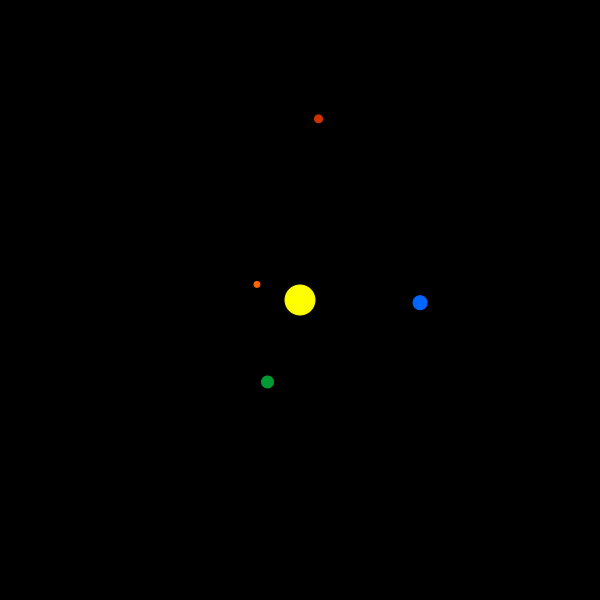

KeyboardInterrupt: 

In [4]:
AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame

# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])

def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
       while( True ):
            D = draw.Drawing(600, 600, origin='center') # clear canvas
            D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
            anim.draw_frame()